# Pokemon Data Science Project
## By Juliette Gudknecht - jg4390
## Python for Data Science Course - Spring 2022

# Introduction
The data set I chose is easily available online at kaggle.com if you search "Pokémon dataset", or is available here: https://www.kaggle.com/datasets/abcsds/pokemon

The reason I chose this data set is because I have a personal interest in Pokémon. Pokémon is a role-playing game in which players must assemble a small team of monsters in order to battle other monsters in a journey to become the "very best". Pokémon are classified into distinct categories, such as psychic or fairy, each having its own set of abilities. The game of chess might be compared to their battles. Pokémon develop strength and new skills as they acquire experience. There isn't necessarily a problem to be solved, but I thought it would be interesting to predict if a Pokémon is legendary or not based on their stats. Legendary Pokémon are a special type of Pokémon that are very powerful that are often associated with legends of creation and/or destruction within their endemic regions. Some legendary pokemon are based off real cultures and historic mythical creatures. I went through the processes of Data/Data Preprocessing, Exploratory Analyses, Methods, Detailed Results, Discussion, and References. The models I used are Logistic Regression, K-Nearest Neighbors, Decision Trees, and XG Boost. They are explained in detail in the methods section. The data set includes the following variables: Name of Pokemon, Type 1 of Pokemon, Type 2 of Pokemon, Total Score, HP, Attack Score, Defense Score, Special Attack, Special Defense, Speed, Generation and Legendary Status. 



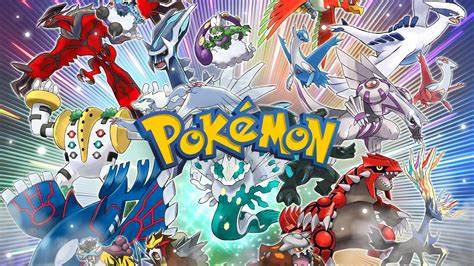


# Data/Data Preprocessing

Step One: Load the data and look at the first few rows.

In [93]:
import pandas as pd
data_path = '/Users/juliettegudknecht/Downloads/columbia/computationalstatistics/Pokemon.csv'

data = pd.read_csv(data_path)
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Step Two: Check for null values, and decide what to do with them. 

In [94]:
pd.isnull(data).values.sum()

386

In [95]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

I am deciding here to keep the null values because it would drastically lower our data set and I find it okay that some don't have a type two.

# Exploratory analyses
Step Three: Descriptive Statistics

In [96]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [97]:
data.pivot_table(values = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
              index = ['Generation'],
              aggfunc = 'mean')

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,76.638554,70.861446,65.819277,71.819277,69.090361,72.584337
2,72.028302,73.386792,71.207547,65.943396,73.905660,61.811321
3,81.625000,74.100000,66.543750,75.806250,71.225000,66.925000
4,82.867769,78.132231,73.082645,76.404959,77.190083,71.338843
5,82.066667,72.327273,71.787879,71.987879,68.739394,68.078788
6,75.804878,76.682927,68.268293,74.292683,74.890244,66.439024


In [98]:
import numpy as np
data.groupby(['Generation'])[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].agg([np.mean, np.min, np.max])

HP               Attack              Defense            \
                 mean amin amax       mean amin amax       mean amin amax   
Generation                                                                  
1           65.819277   10  250  76.638554    5  190  70.861446    5  180   
2           71.207547   20  255  72.028302   10  185  73.386792   10  230   
3           66.543750    1  170  81.625000   15  180  74.100000   20  230   
4           73.082645   20  150  82.867769    5  170  78.132231    5  168   
5           71.787879   30  165  82.066667   25  170  72.327273   30  145   
6           68.268293   38  126  75.804878   22  160  76.682927   33  184   

              Sp. Atk              Sp. Def                Speed            
                 mean amin amax       mean amin amax       mean amin amax  
Generation                                                                 
1           71.819277   15  194  69.090361   20  130  72.584337   15  150  
2           65.943396   10  165  73.905660   20  230  61.811321    5  130  
3           75.806250   10  180  71.225000   20  200  66.925000   10  180  
4           76.404959   10  150  77.190083   30  150  71.338843    5  135  
5           71.987879   15  170  68.739394   25  135  68.078788   10  145  
6           74.292683   27  170  74.890244   25  154  66.439024   23  126

In [99]:
pd.pivot_table(data,index=["Legendary"])

,#,Attack,Defense,Generation,HP,Sp. Atk,Sp. Def,Speed,Total
Legendary,,,,,,,,,
False,353.315646,75.669388,71.559184,3.284354,67.182313,68.454422,68.892517,65.455782,417.213605
True,470.215385,116.676923,99.661538,3.769231,92.738462,122.184615,105.938462,100.184615,637.384615


Overview of descriptive statistics: The stats change slightly by Generation but not drastically. Legendary status obviously has higher statistics.

Step Four: Visualize the data

<AxesSubplot:xlabel='Generation', ylabel='count'>

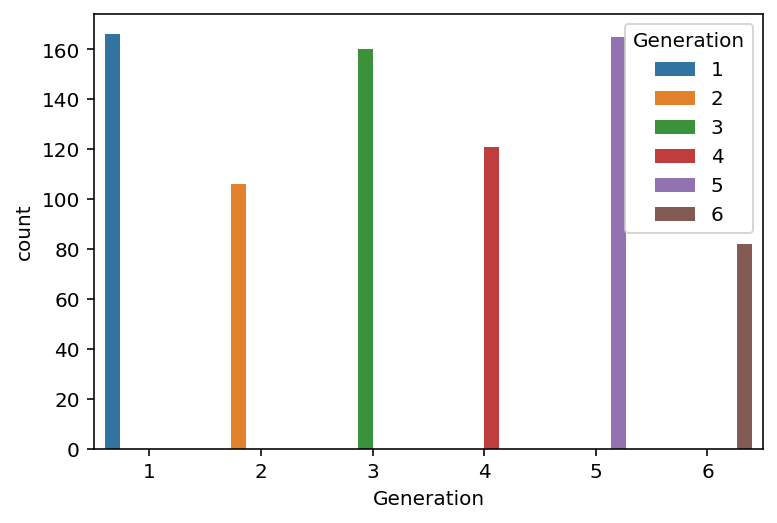

In [100]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.countplot(x='Generation', hue='Generation', data=data)

The 6th generation has the least amount of Pokemon, and the 5th generation has the most. 

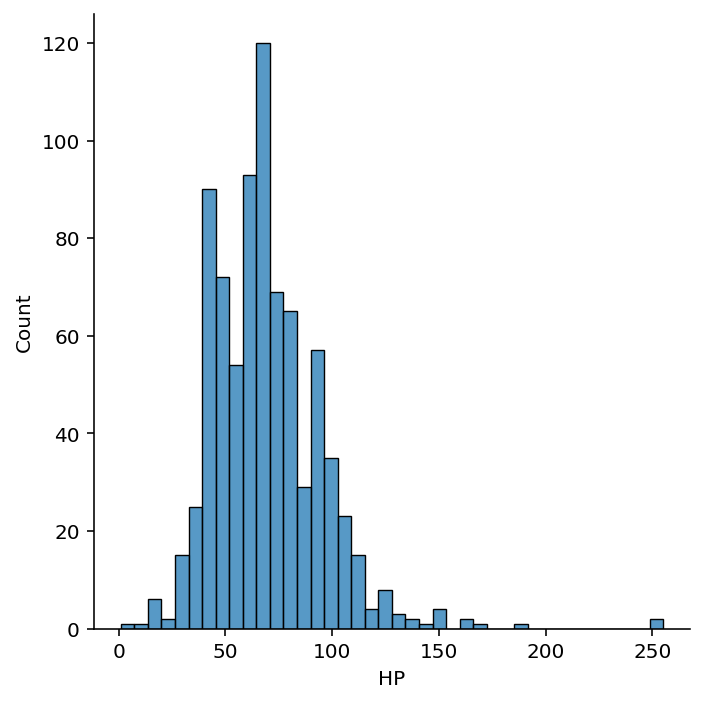

In [101]:
import matplotlib.pyplot as plt
sns.displot(data.HP)
plt.show()

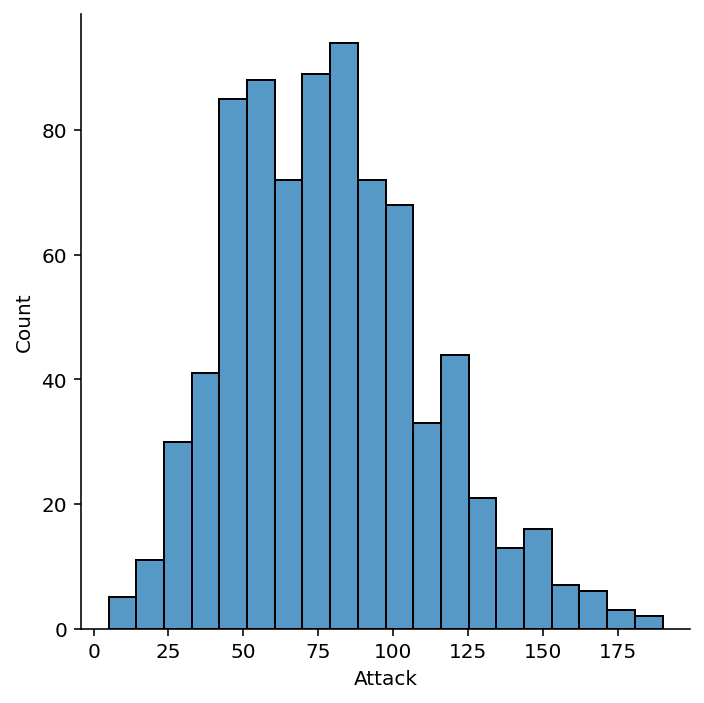

In [102]:
sns.displot(data.Attack)
plt.show()

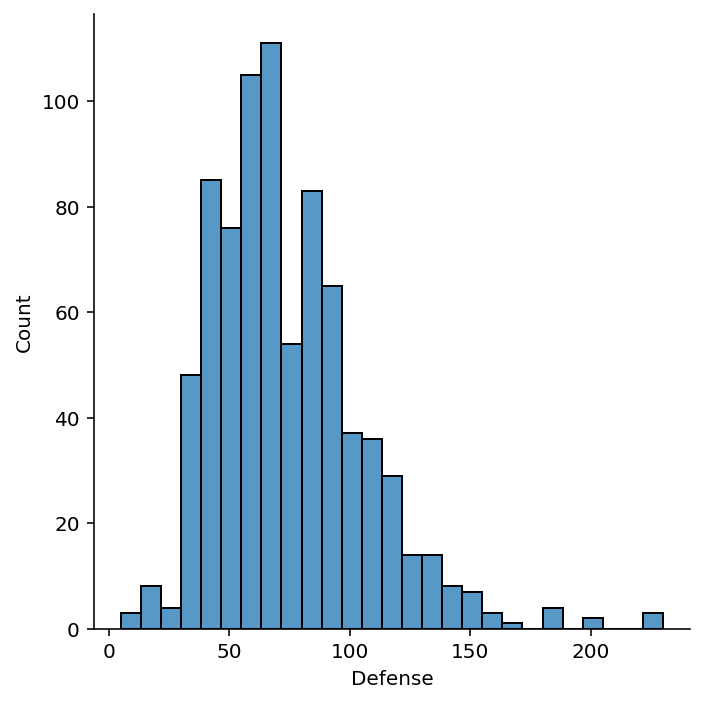

In [103]:
sns.displot(data.Defense)
plt.show()

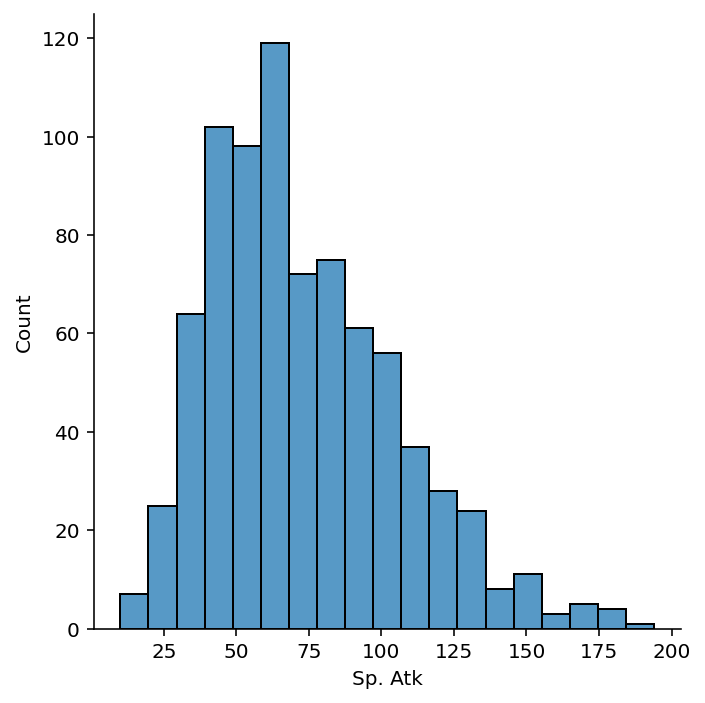

In [104]:
sns.displot(data['Sp. Atk'])
plt.show()

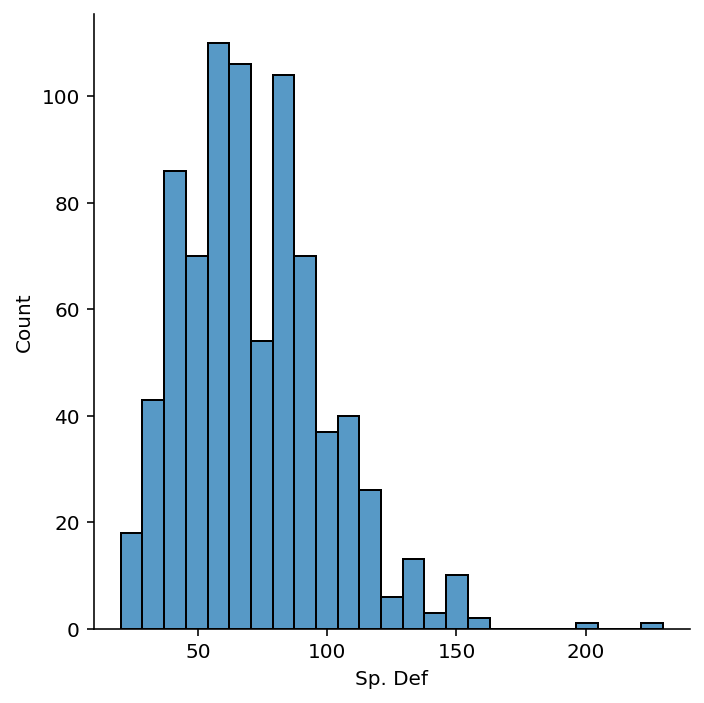

In [105]:
sns.displot(data['Sp. Def'])
plt.show()

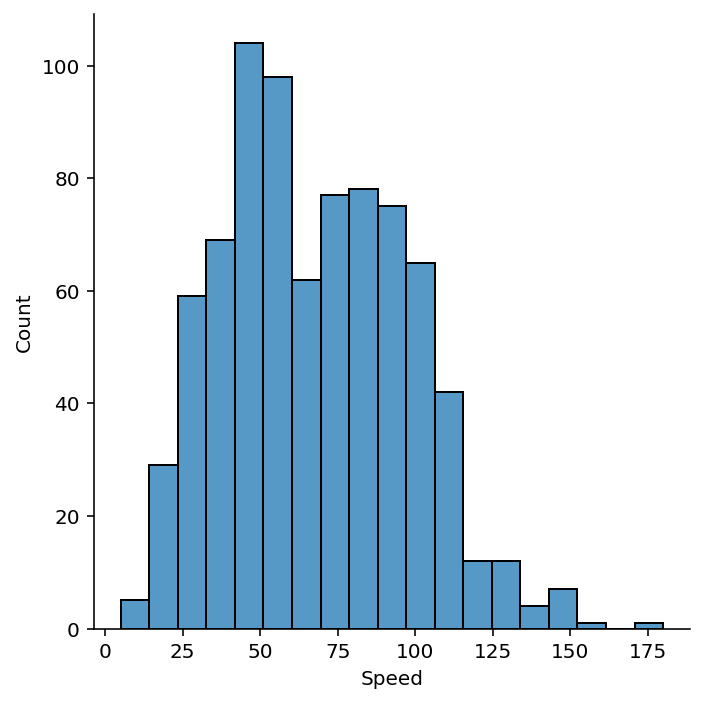

In [134]:
sns.displot(data['Speed'])
plt.show()

The plots are slightly skewed but pretty much a normal distribution. 

<AxesSubplot:xlabel='Legendary'>

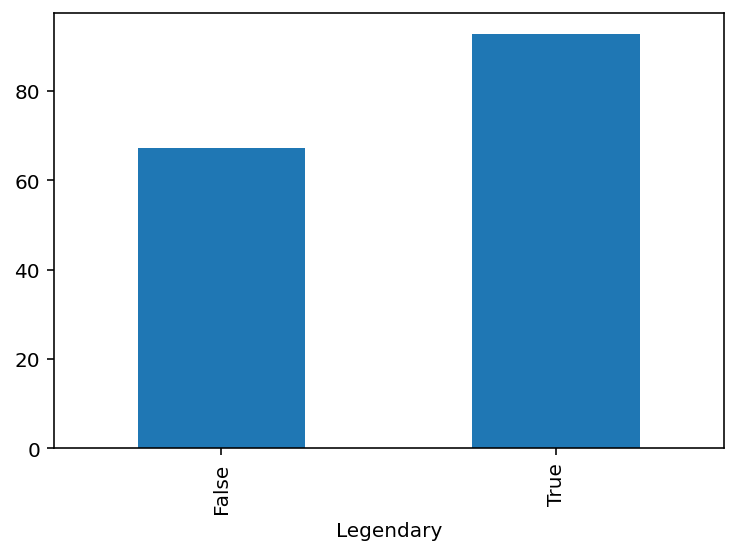

In [107]:
data.groupby('Legendary').HP.mean().plot(kind='bar')

<AxesSubplot:xlabel='Legendary'>

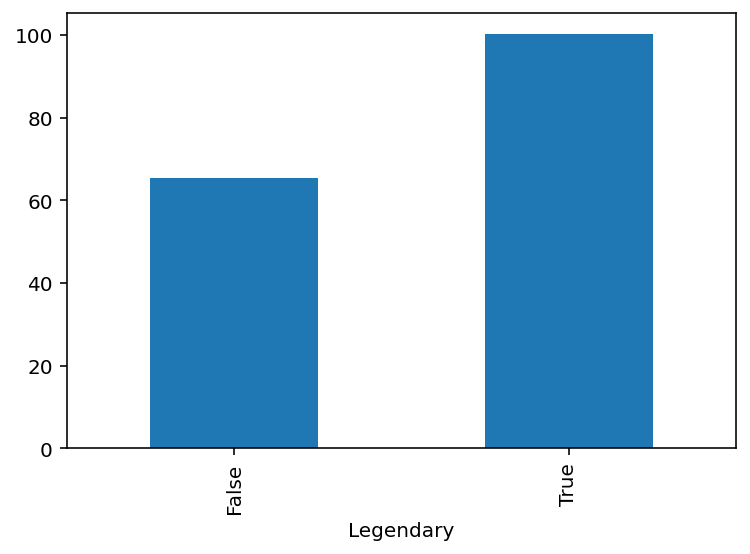

In [108]:
data.groupby('Legendary').Speed.mean().plot(kind='bar')

<AxesSubplot:xlabel='Legendary'>

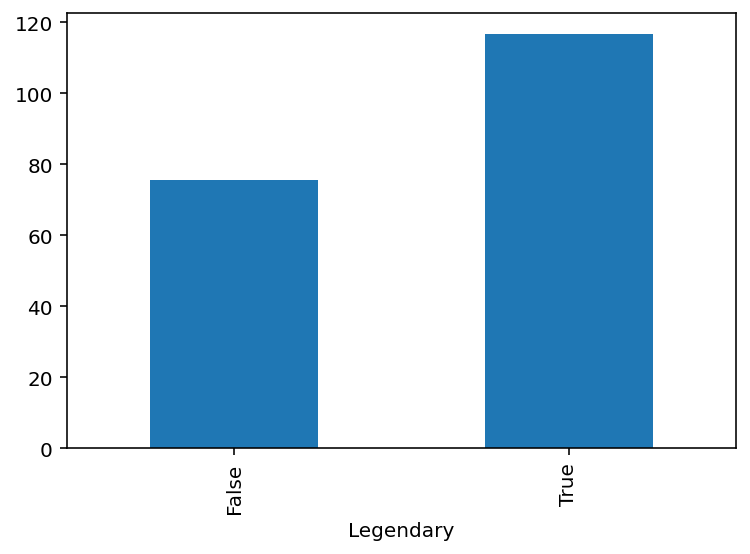

In [109]:
data.groupby('Legendary').Attack.mean().plot(kind='bar')

<AxesSubplot:xlabel='Legendary'>

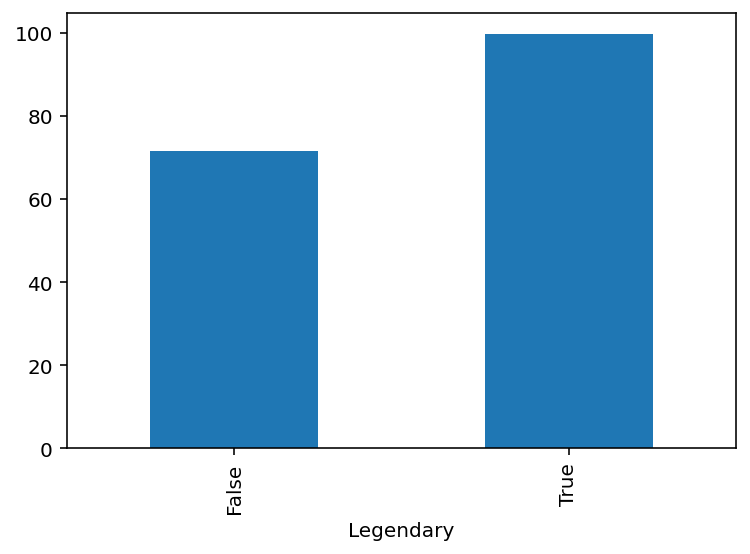

In [110]:
data.groupby('Legendary').Defense.mean().plot(kind='bar')

These plots confirm again that legendary stats are higher than non legendary.

Plots by Type:

In [111]:
import plotly.express as px
fig = px.histogram(data, x="Type 1", color='Type 1', nbins=10)
fig.show()

Water and Normal Pokemon as their first type occur the most. Flying as their first type occur the least.

In [112]:
fig = px.histogram(data, x=data['Type 2'].dropna(), color=data['Type 2'].dropna())
fig.show()

Pokemon with a second type of flying occur the most. Bug occurs the least.

In [113]:
fig = px.scatter(data, x="Total",y='Generation', color='Legendary')
fig.show()

Legendary stats are higher across generations with the highest stat pokemon being legendary and 3rd and 1st generations.

In [114]:
fig = px.box(data, x="Total",y='Type 1', color='Legendary')
fig.show()

Legendary pokemon have higher stats across types. They all have wide ranges.

<AxesSubplot:xlabel='Type 1'>

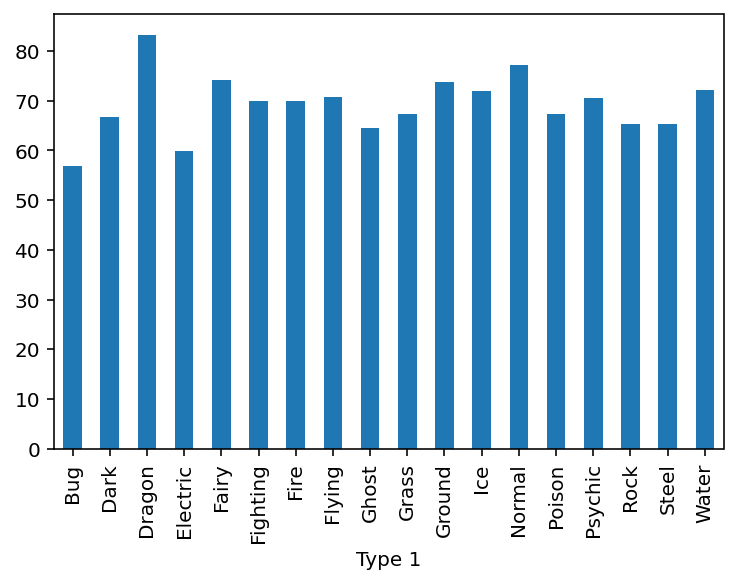

In [115]:
data.groupby('Type 1').HP.mean().plot(kind='bar')

Dragon type have the highest HP, Bug has the lowest.

Text(0.5, 1.0, 'Attack vs Defense')

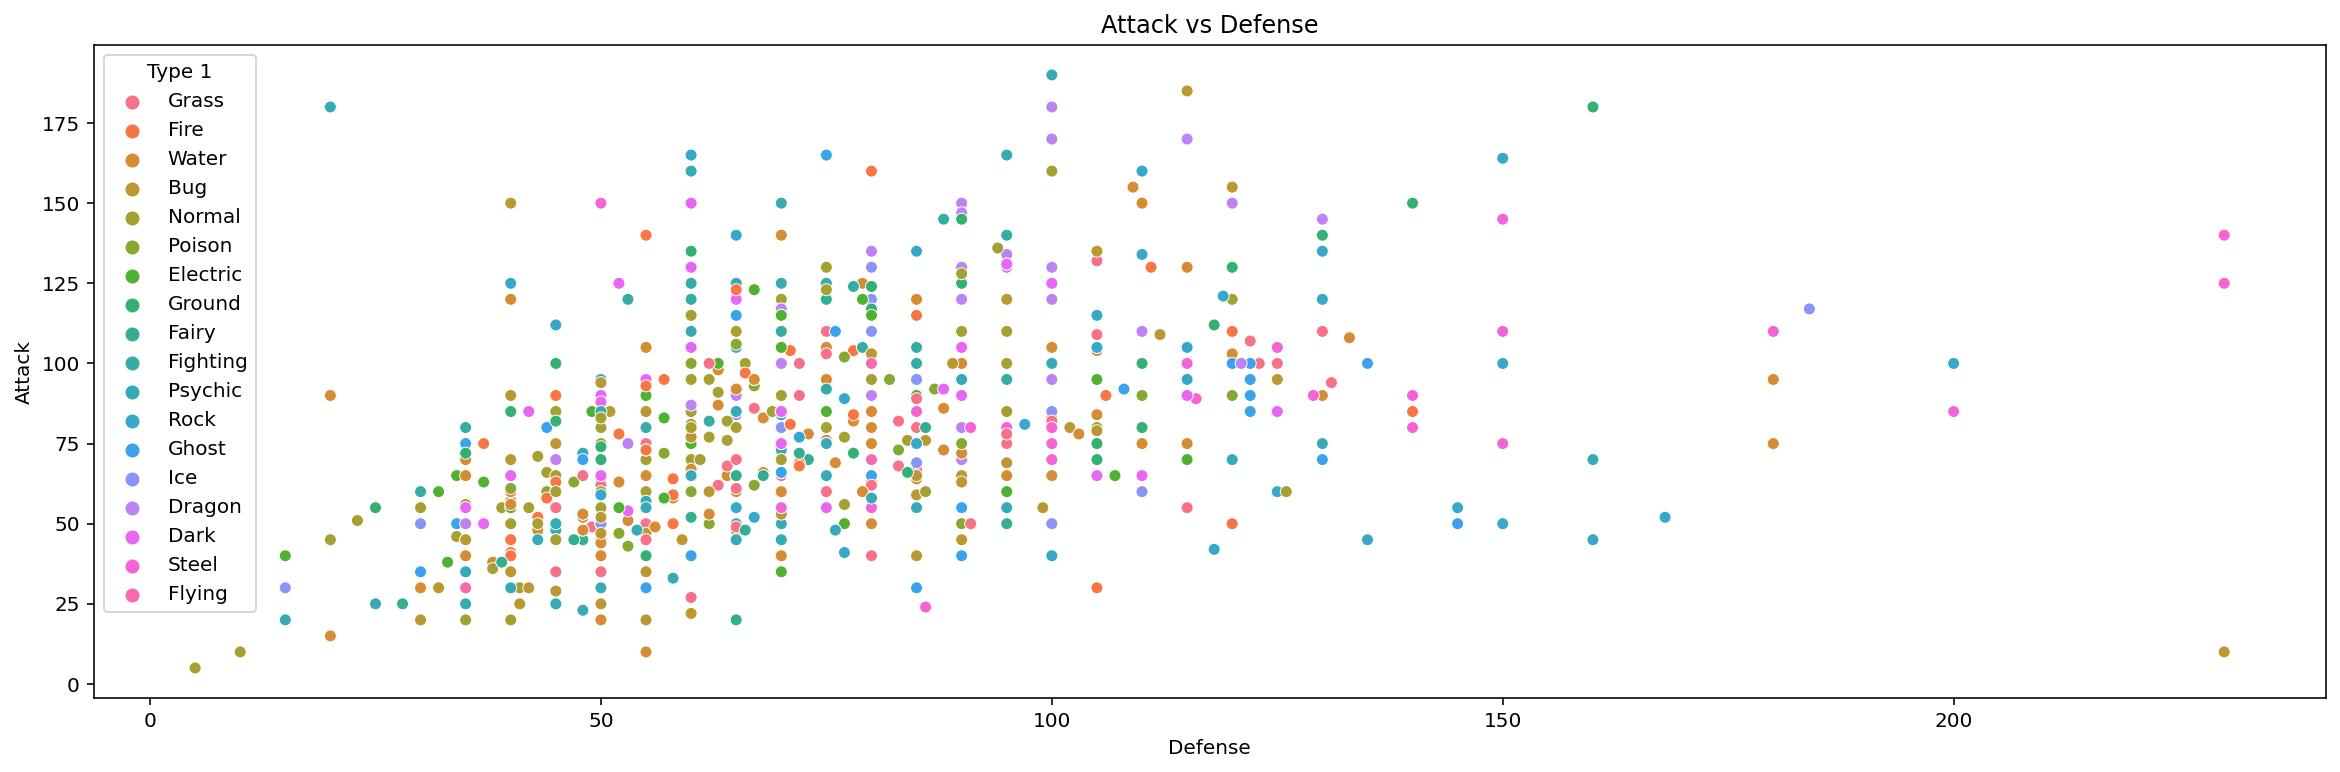

In [116]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=data, x="Defense", y="Attack", hue="Type 1")
plt.title("Attack vs Defense")

Text(0.5, 1.0, 'Special Attack vs Special Defense')

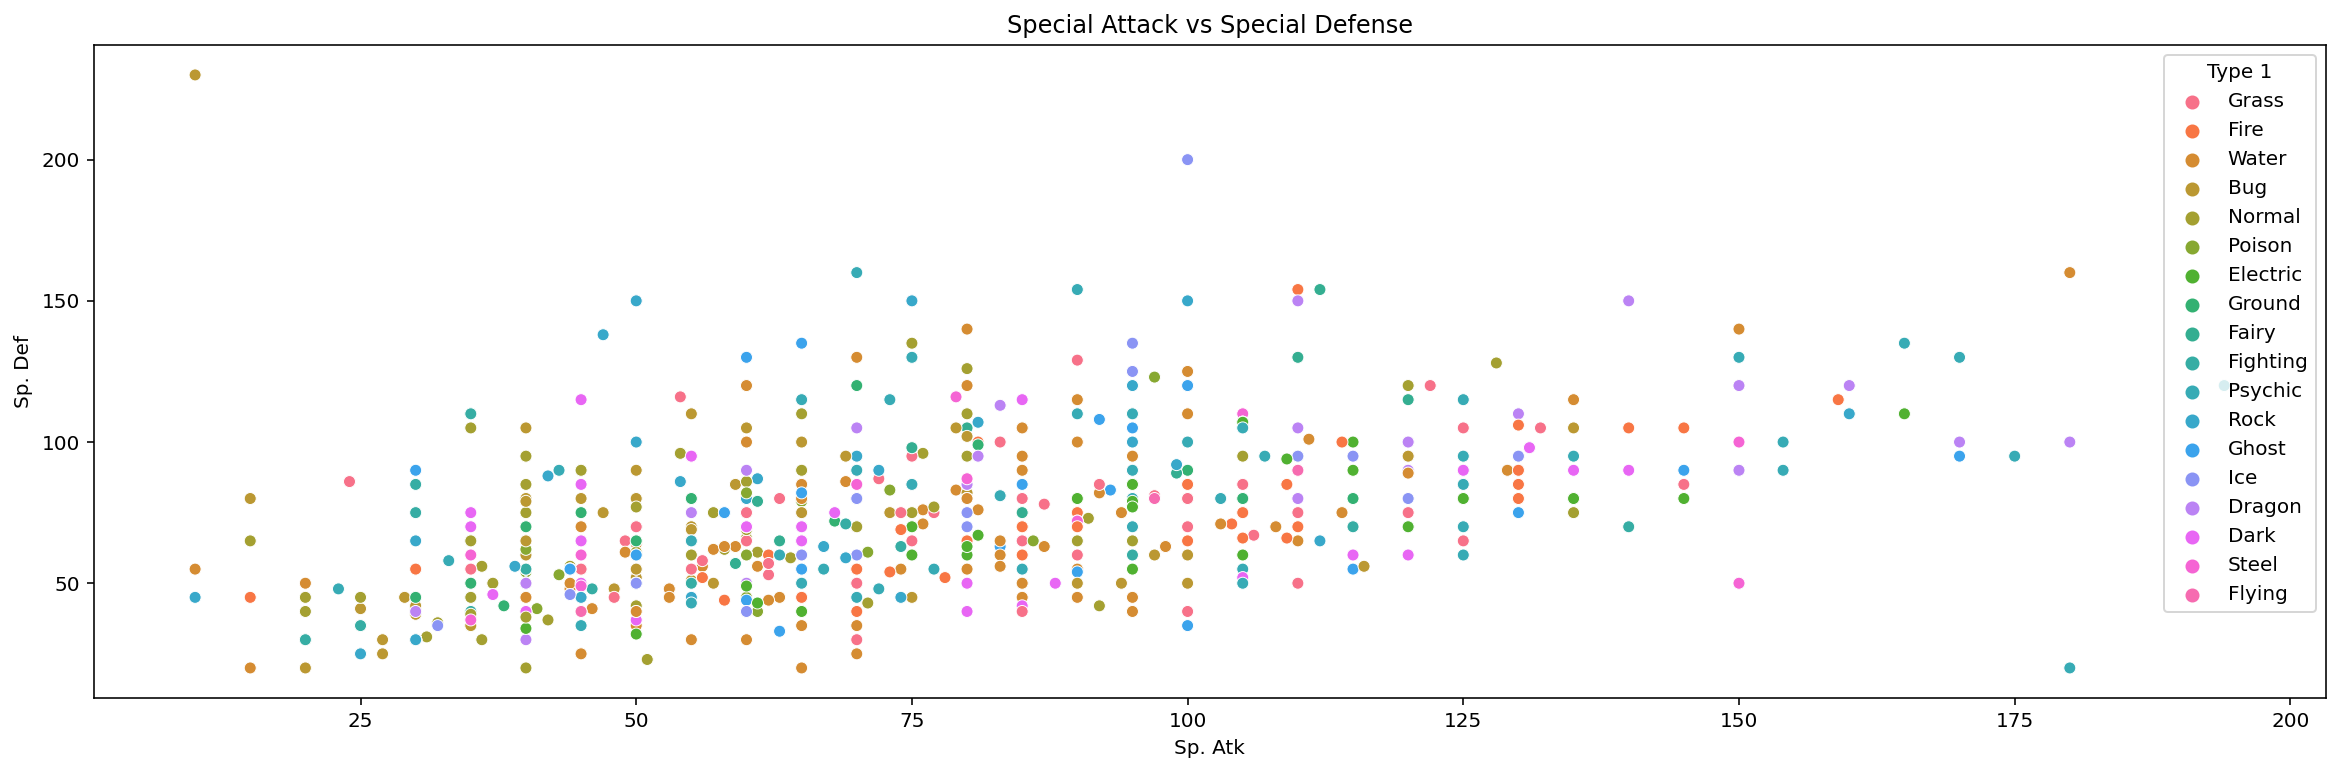

In [117]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=data, x="Sp. Atk", y="Sp. Def", hue="Type 1")
plt.title("Special Attack vs Special Defense")

There seems to be a slight linear relationship in the second graph, the first graph looks more clouded than linear. There doesn't seem to be any relationship between type in these graphs.

### Investigating Legendary Pokemon Closer...
    
Legendary Pokémon are a special type of Pokémon that are very powerful that are often associated with legends of creation and/or destruction within their endemic regions. Some legendary pokemon are based off real cultures and historic mythical creatures.

In [118]:
Legendary = data[data['Legendary'] == True]
Legendary.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


There are 65 legendary pokemon. The mean total is 637. The stats across the board are higher than normal pokemon. 

In [119]:
fig = px.histogram(Legendary, x="Type 1", color='Type 1', nbins=10)
fig.show()

Psychic and dragon occur the most within legendary pokemon which differs from normal pokemon.

In [120]:
fig = px.histogram(Legendary.dropna(), x="Type 2", color='Type 2', nbins=10)
fig.show()

Flying is the highest type 2 for legendary which is the same as normal pokemon.

In [121]:
fig = px.histogram(Legendary, x="Generation", color='Generation', nbins=10)
fig.show()

The third and fifth generation have the most legendary pokemon where the second generation has the least.

<AxesSubplot:xlabel='Generation'>

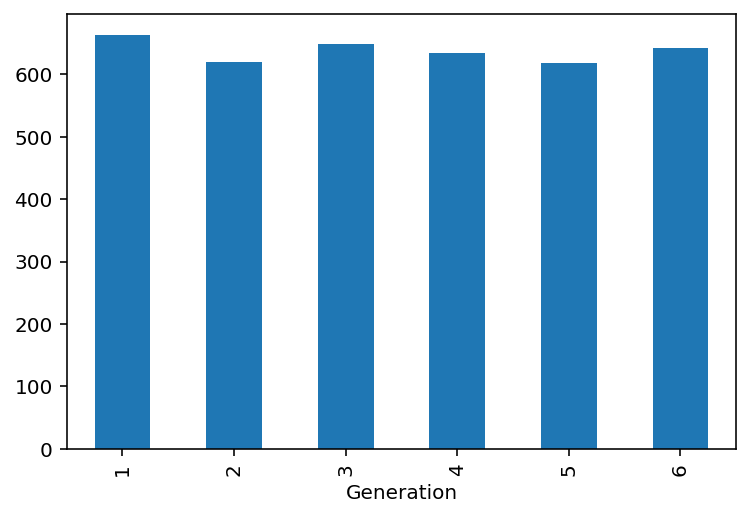

In [122]:
Legendary.groupby('Generation').Total.mean().plot(kind='bar')

<AxesSubplot:xlabel='Type 1'>

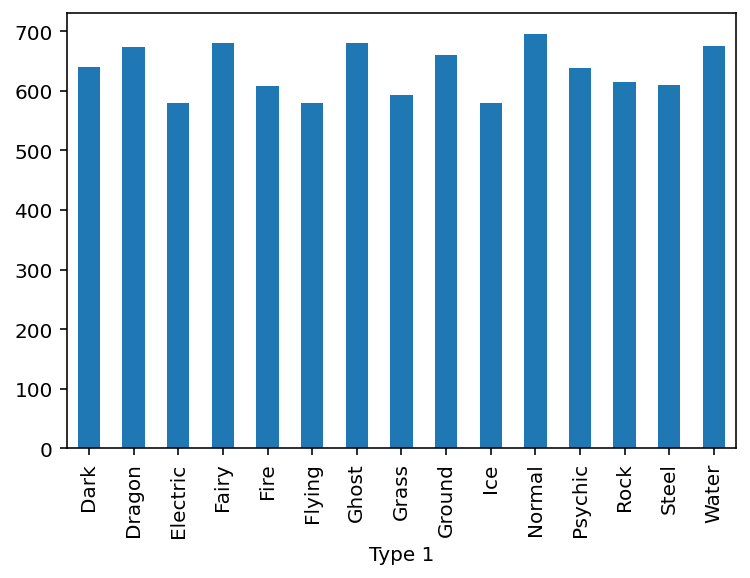

In [123]:
Legendary.groupby('Type 1').Total.mean().plot(kind='bar')

No type or generation seems to be drastically greater than another.

<AxesSubplot:xlabel='Generation', ylabel='Total'>

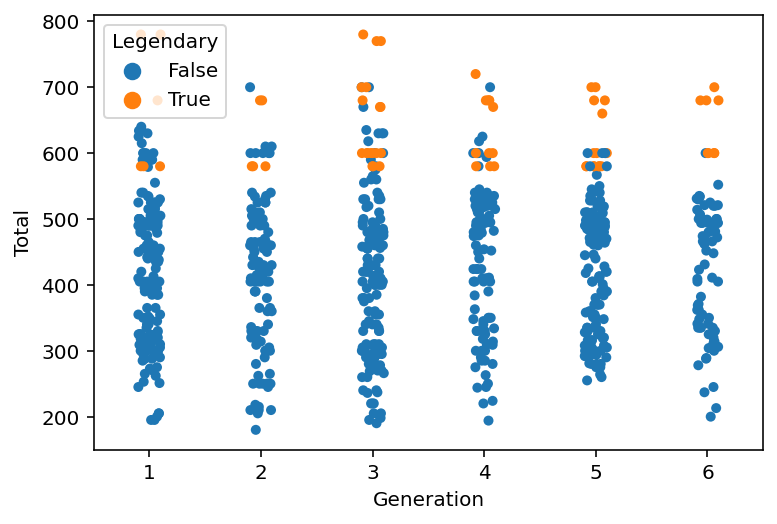

In [124]:
sns.stripplot(y = data['Total'], x = data['Generation'], hue=data['Legendary'])

Legendary Pokemon are the orange dots and obviously have higher statistics than the blue dots, no generation seems to have drastically higher stats besides legendary pokemon in generation 3.

# Methods
Step Five: Modeling

I used the following models because I believe they work best for my data set that is mostly categorical. I chose a test/train split of .25 and .75. The reason for this is to prevent overfitting and to accurately evaluate the model.

In [125]:
from sklearn.model_selection import train_test_split

X = data[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']]
y = data['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## First, I am going to explain what a confusion matrix is. A confusion matrix contains the following:

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive

## A classification report contains the following:

## Precision — What percent of your predictions were correct?

Precision refers to a classifier's ability to avoid labeling a negative instance as positive. It is calculated as the ratio of true positives to the sum of true positives and false positives for each class.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

## Recall — What percent of the positive cases did you catch?

The capacity of a classifier to discover all positive cases is known as recall. It is calculated as the ratio of true positives to the sum of true positives and false negatives for each class.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

## F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall, with 1.0 being the highest and 0.0 being the lowest. F1 scores are lower than accuracy measurements because they factor on precision and recall. 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

## Support

The number of actual occurrences of the class in the provided dataset is known as support. Imbalanced support in the training data could reveal fundamental problems in the classifier's reported scores, necessitating stratified sampling or rebalancing. Support does not alter depending on the model; instead, it diagnoses the evaluation process.

I got most of these explanations from a website listed in my references, since they were not explained in detail in class.

# Logistic Regression 
A logistic regression model is a model that has a certain fixed number of parameters that depend on the number of input features, and it outputs a categorical prediction. The model is very similar to linear regression, but for categorial outcome variables. The assumption of this model is that the outcome variable is binary, and it is. I'll be using the package sklearn for all of my models.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


score_log = round(accuracy_score(y_pred,y_test)*100,2)
print("Accuracy score:", score_log)
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy score: 96.5
Confusion Matrix:  [[186   3]
 [  4   7]]
Classification Report:                precision    recall  f1-score   support

       False       0.98      0.98      0.98       189
        True       0.70      0.64      0.67        11

    accuracy                           0.96       200
   macro avg       0.84      0.81      0.82       200
weighted avg       0.96      0.96      0.96       200



# K-Nearest Neighbors
The supervised learning technique K-nearest neighbors (KNN) is used for both regression and classification. By computing the distance between the test data and all of the training points, KNN tries to predict the proper class for the test data. Then choose the K number of points that are the most similar to the test data. The KNN algorithm analyzes the likelihood of test data belonging to each of the 'K' training data classes, and the class with the highest probability is chosen.

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("Accuracy score: ", score_knn)
print('Confusion Matrix: ', confusion_matrix(y_test, Y_pred_knn))
print('Classification Report: ', classification_report(y_test, Y_pred_knn))

Accuracy score:  98.0
Confusion Matrix:  [[185   4]
 [  0  11]]
Classification Report:                precision    recall  f1-score   support

       False       1.00      0.98      0.99       189
        True       0.73      1.00      0.85        11

    accuracy                           0.98       200
   macro avg       0.87      0.99      0.92       200
weighted avg       0.99      0.98      0.98       200



# Decision Trees
A decision tree is a flowchart-like tree structure in which each internal node represents an attribute test, each branch reflects the test's conclusion, and each leaf node (terminal node) stores a class label.
By separating the source set into subgroups based on an attribute value test, a tree can be "trained." Recursive partitioning is the process of repeating this method on each derived subset. When all of the subsets at a node have the same value of the target variable, or when splitting no longer adds value to the predictions, the recursion is complete.

In [131]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
score_dec = round(accuracy_score(y_pred1,y_test)*100,2)

print("Accuracy Score:", score_dec)
print('Confusion Matrix :', confusion_matrix(y_test, y_pred1))
print('Classification Report: ', classification_report(y_test, y_pred1))

Accuracy Score: 98.0
Confusion Matrix : [[187   2]
 [  2   9]]
Classification Report:                precision    recall  f1-score   support

       False       0.99      0.99      0.99       189
        True       0.82      0.82      0.82        11

    accuracy                           0.98       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.98      0.98      0.98       200



# XG Boost
XGBoost stands for Extreme Gradient Boosting, a popular algorithm in modern machine learning. Boosting is an ensemble modeling strategy that aims to create a strong classifier out of a large number of weak ones. It is accomplished by constructing a model from a sequence of weak models. To begin, a model is created using the training data. The second model is then created, which attempts to correct the faults in the first model. This approach is repeated until either the entire training data set is properly predicted or the maximum number of models has been added.
In XGBoost, Decision trees are constructed sequentially. Weights are very significant. All of the independent variables are given weights, which are subsequently fed into the decision tree, which predicts outcomes. The weight of factors that the tree predicted incorrectly is increased, and these variables are fed into the second decision tree. These various classifiers/predictors are then combined to create a more powerful and precise model. It can be used to solve problems including regression, classification, ranking, and user-defined prediction.

In [130]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("Accuracy score: ", score_xgb)
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_xgb))
print('Classification Report: ', classification_report(y_test, y_pred_xgb))

Accuracy score:  98.0
Confusion Matrix:  [[185   4]
 [  0  11]]
Classification Report:                precision    recall  f1-score   support

       False       1.00      0.98      0.99       189
        True       0.73      1.00      0.85        11

    accuracy                           0.98       200
   macro avg       0.87      0.99      0.92       200
weighted avg       0.99      0.98      0.98       200



# Results

Here is a summary of all of the accuracy rates for the different models (when I ran them):

Logistic Regression: 96.5%

K-Nearest Neighbors: 98.0%

Decision Trees: 98.0%

XGBoost: 98.0%

The most accurate algorithm for this data set is decision trees / xgboost / knn. Meaning, all three of those classifiers correctly classified pokemon 98.0% of the time compared to other model that had a slightly lower accuracy rate (logistic regression). 

# Discussion

My goal for this project was to investigate legendary pokemon and create algorithms to predict legendary status. XGBoost, Decision Trees and KNN performed the best at a tie at 98.0% accuracy, out of the four models used. Logistic regression still performed very well at 96.5% accuracy. All of the models have good precision, recall, F1 score and support scores. The weighted average F1 score can be used to compare accuracy, the XGBoost, Decision Tree and KNN have a .98 score and the Logistic Regression has a .96 score, similar to the accuracy rates. Showing again, that the three models tie for the best accuracy rates and performance of the models in my case. This is interesting because usually XGBoost dominates in model performance, but there isn't a significant difference here in the models. XGBoost is created to outdo decision trees, so it is interesting that here they perform the same. I created multiple graphs and descriptive tables that showed legendary pokemon have higher statistics than the normal pokemon. The graphs were described throughout the notebook. Ways to improve include using more types of analyses, potentially incorportating hypothesis testing, and editing the data set to include more pokemon to be the most up to date. There are limitations to this study, including that the sample size was a little small at 800 pokemon. Another way I could improve is to test all of the assumptions of say, the logistic model like collinearity. Overall, I feel my analyses were appropriate for the dataset used.

# Citations
I used code from class and my personal knowledge of Pokemon and python, along with the sources below.


Microsoft. (n.d.). Pokemon PNG. Bing. Retrieved April 21, 2022, from https://www.bing.com/images/search?view=detailV2&amp;ccid=Rsw8DYbv&amp;id=820AFE5EF8AEE645F590971F50BA85C52FA1DCAD&amp;thid=OIP.Rsw8DYbvdS6AJdBKTnLLAQHaEK&amp;mediaurl=https%3A%2F%2Fs3.us-east-1.amazonaws.com%2Fdexerto-assets-production-cbbdf288%2Fuploads%2F2020%2F09%2F03141440%2Fpokemon-most-popular-legendary.jpg&amp;cdnurl=https%3A%2F%2Fth.bing.com%2Fth%2Fid%2FR.46cc3c0d86ef752e8025d04a4e72cb01%3Frik%3DrdyhL8WFulAflw%26pid%3DImgRaw%26r%3D0&amp;exph=900&amp;expw=1600&amp;q=pokemon%2Blegendary&amp;simid=607987775357855127&amp;FORM=IRPRST&amp;ck=981A88BE09EBE8161B369D43DD91A5F3&amp;selectedIndex=5&amp;ajaxhist=0&amp;ajaxserp=0 


XGBoost. GeeksforGeeks. (2021, October 24). Retrieved April 21, 2022, from https://www.geeksforgeeks.org/xgboost/ 


Christopher, A. (2021, February 3). K-Nearest Neighbor. Medium. Retrieved April 21, 2022, from https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4#:~:text=K-nearest%20neighbors%20%28KNN%29%20is%20a%20type%20of%20supervised,points%20which%20is%20closet%20to%20the%20test%20data. 

z_ai. (2021, September 26). Logistic regression explained. Medium. Retrieved April 21, 2022, from https://towardsdatascience.com/logistic-regression-explained-9ee73cede081 

Solawetz, Jacob. “Train, Validation, Test Split and Why You Need It.” Roboflow Blog, Roboflow Blog, 30 Mar. 2022, https://blog.roboflow.com/train-test-split/. 

Kohli, Shivam. “Understanding a Classification Report for Your Machine Learning Model.” Medium, Medium, 18 Nov. 2019, https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397. 